# I. Introduction

### Ce script a pour objectif de nettoyer, structurer et explorer les données brutes issues de la base MHK SNL/MSU/DOE sur les matériaux composites. Le jeu de données d'origine est fourni sous forme d'un fichier Excel multi-feuilles comportant de nombreuses incohérences de format, de valeurs manquantes et d'hétérogénéité dans les unités ou les libellés.

### L'objectif de ce fichier est de préparer un jeu de données propre, cohérent et exploitable pour des analyses ultérieures (modélisation,cvectorisation, etc.).

# II. Import des bibliothèques

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# III. Chargement du fichier Excel multi-feuilles

In [ ]:
file_path = "../data/raw/FINAL-2018-SNL_MSU_DOE-Environmental-database-28.xlsx"
xls = pd.ExcelFile(file_path)

print("Feuilles disponibles dans le fichier Excel:")
print(xls.sheet_names)

Feuilles disponibles dans le fichier Excel:
['Introduction', 'Fabrics and Resins', 'Environmental']


#### Exploration rapide de chaque feuille

In [90]:
for sheet in xls.sheet_names:
    print(f"\nFeuille: {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet)
    print(f"Colonnes ({len(df.columns)}): {df.columns.tolist()}")
    print("Aperçu des 5 premières lignes:")
    print(df.head())


Feuille: Introduction
Colonnes (2): ['Unnamed: 0', 'SNL/MSU/DOE COMPOSITE MATERIAL FATIGUE DATABASE - Environmental']
Aperçu des 5 premières lignes:
  Unnamed: 0 SNL/MSU/DOE COMPOSITE MATERIAL FATIGUE DATABASE - Environmental
0        NaN  Mechanical Properties of Composite Materials f...             
1        NaN                    Version 28E; September 30, 2018             
2        NaN                 Montana State University - Bozeman             
3        NaN                                   SAND2018-11426 R             
4        NaN  This database was prepared as a part of  work ...             

Feuille: Fabrics and Resins
Colonnes (9): ['This is a list of the major reinforcing fabrics and resin systems used in this database. Further information and data for systems not listed here can be found in the published papers and contractors reports.', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
Aperçu des 5 première

#### Chargement spécifique de la feuille 'Environmental'

In [ ]:
df_env = pd.read_excel(xls, sheet_name='Environmental')
print(f"\nColonnes dans 'Environmental' ({len(df_env.columns)}): {df_env.columns.tolist()}")
print("\nAperçu des 10 premières lignes:")
print(df_env.head(10))


Colonnes dans 'Environmental' (41): ['Material', 'Lay-up', 'Vf, %', 'Resin Type', 'Resin', '0 Deg fabric', '%, 0 Deg', '45 Deg fabric', '%, 45 Deg', '90 deg fabric', '%, 90 Deg', 'other %', 'Thickness, mm', 'Cure / Post Cure', 'Process', 'Test #', 'Coupon', 'Max. Stress, MPa', 'Min. Stress, MPa', 'R-value', 'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain', 'Min. % Strain', 'Cycles', 'Runout', 'Moisture Gain, %', 'Initial cracking strain, %', 'Modulus after initial cracking, GPa', 'Notes', 'Notes.1', 'Notes.2', 'Notes.3', 'Notes.4', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Contractor report', 'Conference Paper', 'Student Thesis']

Aperçu des 10 premières lignes:
  Material           Lay-up Vf, % Resin Type                Resin  \
0      NaN              NaN   NaN        NaN                  NaN   
1      CE1  [V(+/-45)g/0c]S  40.4      Epoxy  Pro-set INF 114/211   
2      CE1  [V(+/-45)g/0c]S  42.4      Epoxy  Pro-set INF 114/211   
3      CE1  [V(+/-45)g/0

# IV. Nettoyage de base

In [92]:
df_clean = df_env.copy()
df_clean = df_clean[df_clean['Material'].notna()]
cols_to_drop = [col for col in df_clean.columns if col.startswith('Unnamed') or col.startswith('Notes')]
df_clean = df_clean.drop(columns=cols_to_drop)
df_clean = df_clean.reset_index(drop=True)

# V. Conversion des colonnes numériques

In [93]:
cols_num = ['Vf, %', 'Thickness, mm', 'Max. Stress, MPa', 'Min. Stress, MPa', 'R-value', 
            'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain', 'Min. % Strain',
            'Cycles', 'Runout', 'Moisture Gain, %', 'Initial cracking strain, %', 'Modulus after initial cracking, GPa']

for col in cols_num:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [94]:
print(f"Forme après nettoyage: {df_clean.shape}")
print(df_clean.head())

Forme après nettoyage: (2560, 32)
  Material           Lay-up  Vf, % Resin Type                Resin  \
0      CE1  [V(+/-45)g/0c]S   40.4      Epoxy  Pro-set INF 114/211   
1      CE1  [V(+/-45)g/0c]S   42.4      Epoxy  Pro-set INF 114/211   
2      CE1  [V(+/-45)g/0c]S   39.3      Epoxy  Pro-set INF 114/211   
3      CE1  [V(+/-45)g/0c]S   44.8      Epoxy  Pro-set INF 114/211   
4      CE1  [V(+/-45)g/0c]S   45.5      Epoxy  Pro-set INF 114/211   

   0 Deg fabric %, 0 Deg 45 Deg fabric %, 45 Deg 90 deg fabric  ...  \
0  Zoltek UD600   57.6 C     E-BX-1700    42.2 G             0  ...   
1  Zoltek UD600   57.6 C     E-BX-1700    42.2 G             0  ...   
2  Zoltek UD600   57.6 C     E-BX-1700    42.2 G             0  ...   
3  Zoltek UD600   57.6 C     E-BX-1700    42.2 G             0  ...   
4  Zoltek UD600   57.6 C     E-BX-1700    42.2 G             0  ...   

  Max. % Strain Min. % Strain  Cycles Runout Moisture Gain, %  \
0          1.13           NaN     1.0    NaN         

In [95]:
print(df_clean.describe(include='all'))

                  Material      Lay-up        Vf, % Resin Type  \
count                 2560        2559  2460.000000       2558   
unique                  74          35          NaN         21   
top     MD-DD5P-UP2-Enviro  [0/±45/0]S          NaN      Epoxy   
freq                   251         626          NaN        413   
mean                   NaN         NaN    44.132927        NaN   
std                    NaN         NaN    10.629613        NaN   
min                    NaN         NaN    24.000000        NaN   
25%                    NaN         NaN    35.000000        NaN   
50%                    NaN         NaN    38.800000        NaN   
75%                    NaN         NaN    55.900000        NaN   
max                    NaN         NaN    63.500000        NaN   

                              Resin           0 Deg fabric  %, 0 Deg  \
count                          2486                   2461    2559.0   
unique                           36                     23     

# VI. Renommage cohérent de certaines colonnes

In [96]:
df_clean.rename(columns={
    '0 Deg fabric': '0 Deg fabric name',
    '%, 0 Deg': '0 Deg fabric %',
    '45 Deg fabric': '45 Deg fabric name',
    '%, 45 Deg': '45 Deg fabric %',
    '90 deg fabric': '90 Deg fabric name',
    '%, 90 Deg': '90 Deg fabric %'
}, inplace=True)

# VII. Suppression des colonnes trop incomplètes (> 80% NaN)

#### Nettoyage des colonnes de tissu (fabric)

In [97]:
df_clean['0 Deg fabric %'] = df_clean['0 Deg fabric %'].str.extract(r'(\d+\.?\d*)').astype(float)
print(df_clean[['0 Deg fabric name', '0 Deg fabric %']].head())

  0 Deg fabric name  0 Deg fabric %
0      Zoltek UD600            57.6
1      Zoltek UD600            57.6
2      Zoltek UD600            57.6
3      Zoltek UD600            57.6
4      Zoltek UD600            57.6


#### Suppression des colonnes trop vides

In [98]:
threshold = len(df_clean) * 0.2
df_clean = df_clean.dropna(axis=1, thresh=threshold)

print(f"Colonnes restantes après suppression: {df_clean.columns.tolist()}")

Colonnes restantes après suppression: ['Material', 'Lay-up', 'Vf, %', 'Resin Type', 'Resin', '0 Deg fabric name', '45 Deg fabric name', '45 Deg fabric %', '90 Deg fabric name', '90 Deg fabric %', 'other %', 'Thickness, mm', 'Cure / Post Cure', 'Process', 'Test #', 'Coupon', 'Max. Stress, MPa', 'Min. Stress, MPa', 'R-value', 'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain', 'Cycles', 'Moisture Gain, %', 'Contractor report', 'Conference Paper']


#### Conversion des colonnes numériques

In [99]:
numeric_cols = ['Vf, %', 'Thickness, mm', 'Max. Stress, MPa', 'Min. Stress, MPa', 
                'R-value', 'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain',
                'Min. % Strain', 'Cycles', 'Moisture Gain, %', 'Initial cracking strain, %',
                'Modulus after initial cracking, GPa']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

#### Conversion des colonnes catégorielles

In [100]:
cat_cols = ['Material', 'Lay-up', 'Resin Type', 'Resin', 
            '0 Deg fabric name', '45 Deg fabric', '90 deg fabric']

for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# IX. Sauvegarde

In [ ]:
df_clean.to_csv('../data/processed/MHK_material_database_cleaned.csv', index=False)

#### Suppression des colonnes avec trop de NaNs

In [102]:
threshold = 0.5 * len(df_clean)
cols_to_drop = [col for col in df_clean.columns if df_clean[col].isna().sum() > threshold]
df_clean = df_clean.drop(columns=cols_to_drop)

# VIII. Imputation des données manquantes

In [103]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean.loc[:, col] = df_clean[col].fillna(median_val)

#### Imputation des colonnes catégorielles avec "Unknown"

In [104]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna("Unknown")

print(df_clean.isna().sum())

Material               0
Lay-up                 1
Vf, %                  0
Resin Type             2
Resin                 74
0 Deg fabric name     99
45 Deg fabric name     0
45 Deg fabric %        0
90 Deg fabric name     0
90 Deg fabric %        0
other %                0
Thickness, mm          0
Cure / Post Cure       0
Process                0
Coupon                 0
Max. Stress, MPa       0
Freq., Hz or mm/s      0
E, GPa (0.1-0.3%)      0
Max. % Strain          0
Cycles                 0
dtype: int64


In [106]:
df_clean = df_clean.dropna()
print(f"Forme après suppression: {df_clean.shape}")

Forme après suppression: (2387, 20)


# X. Exploration statistique de base

#### Définir les colonnes numériques

In [107]:
numeric_cols = ['Vf, %', 'Thickness, mm', 'Max. Stress, MPa', 'Freq., Hz or mm/s', 'E, GPa (0.1-0.3%)', 'Max. % Strain', 'Cycles']

#### Résumé statistique

In [108]:
print(df_clean[numeric_cols].describe())

             Vf, %  Thickness, mm  Max. Stress, MPa  Freq., Hz or mm/s  \
count  2387.000000    2387.000000       2387.000000        2387.000000   
mean     43.998953       3.010943        347.468098           1.144356   
std      10.729962       1.113807        358.626226           1.248152   
min      24.000000       1.170000       -612.000000           0.017000   
25%      35.000000       2.060000        103.000000           1.000000   
50%      38.100000       3.150000        276.000000           1.000000   
75%      55.900000       3.200000        444.000000           1.000000   
max      63.500000       5.790000       2627.000000          10.000000   

       E, GPa (0.1-0.3%)  Max. % Strain        Cycles  
count        2387.000000    2387.000000  2.387000e+03  
mean           27.596724       1.483450  8.082580e+04  
std            20.603243       0.641102  4.887893e+05  
min             0.070000      -2.000000  1.000000e+00  
25%            17.400000       1.395000  1.000000e+00

#### Histogrammes (distribution)

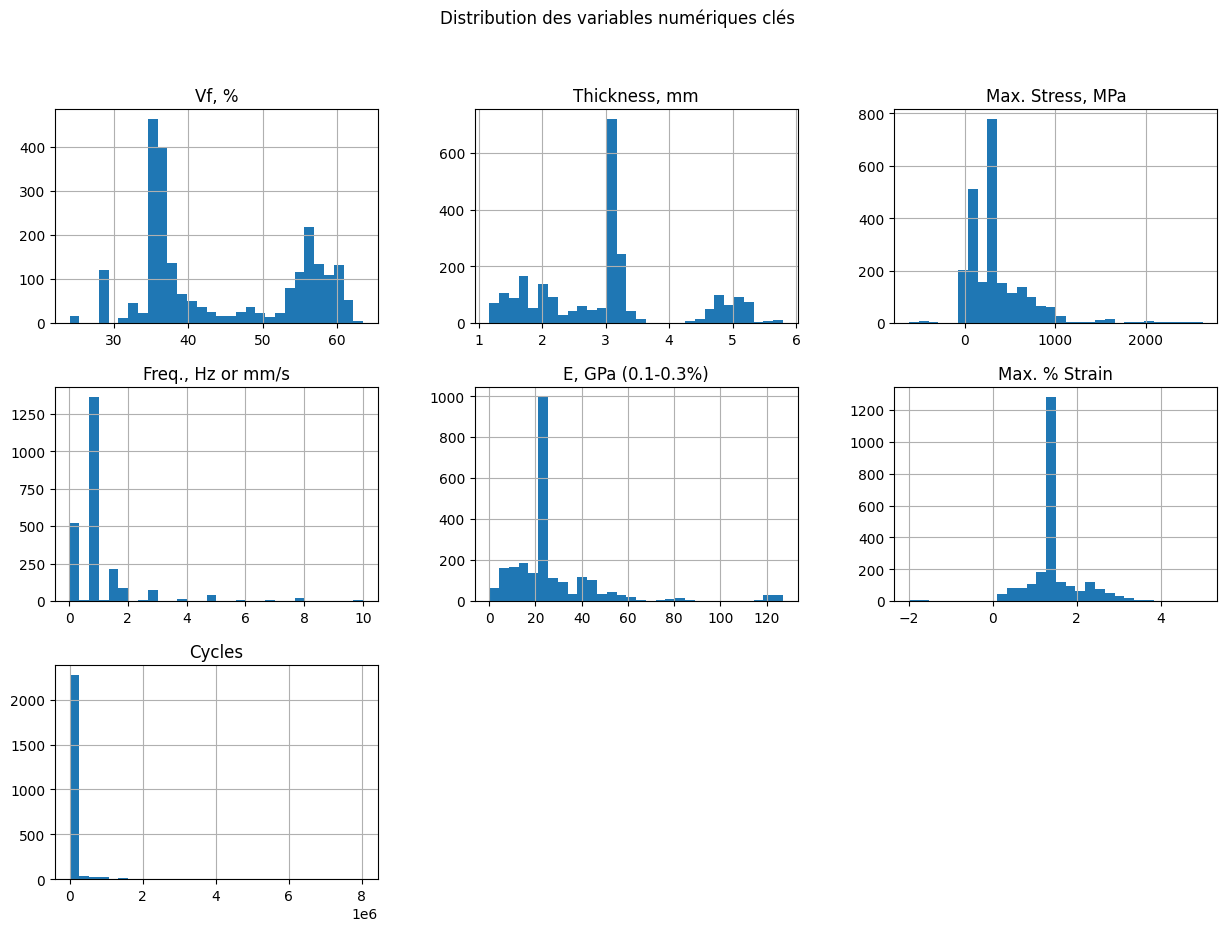

In [109]:
df_clean[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution des variables numériques clés')
plt.show()

# XI. Conclusion

### Les données sont désormais prêtes pour être analysées, modélisées ou vectorisées. Le fichier nettoyé servira de base stable pour toute la suite du projet (base relationnelle, recherche de similarité, modélisation prédictive...).